# GROUP TWO: For most of these you'll need a spatial join

### 1.	How many power plants are in each state?

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
pd.set_option('max_columns', 80)

In [3]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [4]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [5]:
powerplants.crs

{'init': 'epsg:4269'}

In [6]:
pplants_with_states = gpd.sjoin(powerplants, states, how='inner', op='within')
pplants_with_states

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,1237.0,497.0,740.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 497 MW, Natural Gas = 740 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,32.601700,-87.781100,POINT (-87.7811 32.6017),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,POINT (-86.05240000000001 33.7845),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,45.0,0.0,0.0,0.0,NaN,45.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,POINT (-87.4495 33.2553),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,POINT (-86.2548 32.6189),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
10,14,Logan Martin Dam,Alabama Power Co,195,Electric Utility,Vincent,Talladega,35178,299 Logan Martin Road,hydroelectric,135.0,0.0,0.0,0.0,NaN,135.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 135 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.425878,-86.337547,POINT (-86.337547 33.425878)

In [7]:
pplants_with_states.STUSPS.value_counts()

CA    1222
NC     461
TX     396
NY     372
MN     274
MA     254
IA     222
MI     219
NJ     207
PA     207
IL     200
WI     174
CO     153
OH     148
OR     145
FL     144
GA     139
WA     138
AK     138
ID     136
IN     133
VA     131
KS     129
MO     117
AZ     113
NE      98
ME      97
SC      95
OK      94
NM      92
UT      89
CT      88
LA      84
MD      76
VT      75
NV      74
AL      72
NH      66
WY      62
TN      61
AR      55
HI      50
ND      50
MT      50
KY      46
MS      40
WV      35
SD      33
DE      25
RI      19
DC       2
Name: STUSPS, dtype: int64

### 2.	Which power plants are in New York?

In [8]:
pplants_with_states[pplants_with_states.STUSPS == 'NY'].Utility_Na

49               New York Power Authority
363        Central Hudson Gas & Elec Corp
387        New York State Elec & Gas Corp
469              New York Power Authority
1169                    Danskammer Energy
1170       Central Hudson Gas & Elec Corp
1171             New York Power Authority
1172       Central Hudson Gas & Elec Corp
1173       Central Hudson Gas & Elec Corp
1174       Central Hudson Gas & Elec Corp
1175       NRG Arthur Kill Operations Inc
1176        Consolidated Edison Co-NY Inc
1177     U S Power Generating Company LLC
1178        Consolidated Edison Co-NY Inc
1179       Entergy Nuclear Indian Point 2
1180     U S Power Generating Company LLC
1181                    TC Ravenswood LLC
1182        Consolidated Edison Co-NY Inc
1183        Consolidated Edison Co-NY Inc
1184         National Grid Generation LLC
1185         National Grid Generation LLC
1186         National Grid Generation LLC
1187         National Grid Generation LLC
1188         National Grid Generat

### 3.	Which state has the most hydroelectric power plants?

In [9]:
pplants_hydro = gpd.sjoin(powerplants[powerplants.PrimSource == 'hydroelectric'], states, how='inner', op='within')
pplants_hydro.head(6)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,70.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 70 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.784500,-86.052400,POINT (-86.05240000000001 33.7845),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,45.0,0.0,0.0,0.0,NaN,45.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 45 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.255300,-87.449500,POINT (-87.4495 33.2553),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,100.0,0.0,0.0,0.0,NaN,100.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 100 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.618900,-86.254800,POINT (-86.2548 32.6189),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
10,14,Logan Martin Dam,Alabama Power Co,195,Electric Utility,Vincent,Talladega,35178,299 Logan Martin Road,hydroelectric,135.0,0.0,0.0,0.0,NaN,135.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 135 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.425878,-86.337547,POINT (-86.337547 33.425878),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [10]:
pplants_hydro.STUSPS.value_counts().head(1)

CA    245
Name: STUSPS, dtype: int64

### 4.	Which state produces the most energy from coal?

In [11]:
pplants_coal = gpd.sjoin(powerplants[powerplants['Coal_MW'] >= 1.0], states, how='inner', op='within')

In [12]:
pplants_coal.groupby('STUSPS')['Coal_MW'].sum().sort_values(ascending=False).head(1)

STUSPS
TX    23588.5
Name: Coal_MW, dtype: float64

### 5.	Map states with nuclear power plants in red, and states without in grey.  Do the same thing for solar.

In [13]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [14]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [15]:
states_with_nuclear = gpd.sjoin(states, powerplants[powerplants.PrimSource == 'nuclear'], how='inner', op='contains')
states_with_nuclear

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",22,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,35609,Shaw Rd. PO Box 2000,nuclear,3309.4,0.0,0.0,0.0,NaN,0.0,0.0,3309.4,0.0,0.0,NaN,NaN,Nuclear = 3309.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,34.704200,-87.118900
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",1820,6001,Joseph M Farley,Alabama Power Co,195,Electric Utility,Columbia,Houston,36319,7388 North State Highway 95,nuclear,1757.0,0.0,0.0,0.0,NaN,0.0,0.0,1757.0,0.0,0.0,NaN,NaN,Nuclear = 1757 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,31.223100,-85.111600
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",1824,6008,Palo Verde,Arizona Public Service Co,803,Electric Utility,Wintersburg,Maricopa,85036,Wintersburg Road,nuclear,3937.0,0.0,0.0,0.0,NaN,0.0,0.0,3937.0,0.0,0.0,NaN,NaN,Nuclear = 3937 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,33.388100,-112.861700
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",2547,8055,Arkansas Nuclear One,Entergy Arkansas Inc,814,Electric Utility,Russellville,Pope,72801,1448 STATE RD 333,nuclear,1808.5,0.0,0.0,0.0,NaN,0.0,0.0,1808.5,0.0,0.0,NaN,NaN,Nuclear = 1808.5 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,35.311000,-93.235100
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1885,6099,Diablo Canyon,Pacific Gas & Electric Co,14328,Electric Utility,Avila Beach,San Luis Obispo,93424,Avila Rd. bet. Montano de Oro,nuclear,2240.0,0.0,0.0,0.0,NaN,0.0,0.0,2240.0,0.0,0.0,NaN,NaN,Nuclear = 2240 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,35.211536,-120.855542
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41...",361,566,Millstone,Dominion Nuclear Conn Inc,5221,IPP Non-CHP,Waterford,New London,6385,Route 156 Rope Ferry Road,nuclear,2087.8,0.0,0.0,0.0,NaN,0.0,0.0,2087.8,0.0,0.0,NaN,NaN,Nuclear = 2087.8 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,41.310700,-72.167700
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27...",398,649,Vogtle,Georgia Power Co,7140,Electric Utility,Waynesboro,Burke,30830,7821 River Road,nuclear,2302.0,0.0,0.0,0.0,NaN,0.0,0.0,2302.0,0.0,0.0,NaN,NaN,Nuclear = 2302 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,33.142700,-81.762500
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27...",1854,6051,Edwin I Hatch,Georgia Power Co,7140,Electric Utility,Baxley,Appling,31513,US Highway 1 North,nuclear,1759.0,0.0,0.0,0.0,NaN,0.0,0.0,1759.0,0.0,0.0,NaN,NaN,Nuclear = 1759 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,31.934200,-82.344700
12,0400000US17,143788697679,6206693598,17,00,Illinois,17,01779784,IL,"POLYGON ((-91.512974 40.181062, -91.511073 40....",106,204,Clinton Power Station,Exelon Nuclear,55951,IPP Non-CHP,Clinton,DeWitt,61727,Rt. 54 West,nuclear,1065.0,0.0,0.0,0.0,NaN,0.0,0.0,1065.0,0.0,0.0,NaN,NaN,Nuclear = 1065 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,40.171900,-88.833900
12,0400000US17,143788697679,6206693598,17,00,Illinois,17,01779784,IL,"POLYGON ((-91.512974 40.181062, -91.511073 40....",502,869,Dresden Generating Station,Exelon Nuclear,55951,IPP Non-CHP,Morris,Grundy,60450,12RR1 Morris,nuclear,1797.0,0.0,0.0,0.0

In [16]:
states.set_index('STATEFP', inplace=True)
states.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATENS,STUSPS,geometry
STATEFP,,,,,,,,,
01,0400000US01,131173688951,4593686489,01,00,Alabama,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
02,0400000US02,1477946266785,245390495931,02,00,Alaska,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
04,0400000US04,294198560125,1027346486,04,00,Arizona,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
05,0400000US05,134771517596,2960191698,05,00,Arkansas,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
06,0400000US06,403501101370,20466718403,06,00,California,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [17]:
states_with_nuclear.groupby('STATEFP').size()

STATEFP
01    2
04    1
05    1
06    1
09    1
12    2
13    2
17    6
19    1
20    1
22    2
24    1
25    1
26    3
27    2
28    1
29    1
31    2
33    1
34    3
36    5
37    3
39    2
42    5
45    4
47    2
48    2
51    2
53    1
55    1
dtype: int64

In [18]:
states['nuclear_count'] = states_with_nuclear.groupby('STATEFP').size()
states['nuclear_count'].fillna(0, inplace=True)
states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATENS,STUSPS,geometry,nuclear_count
STATEFP,,,,,,,,,,
01,0400000US01,131173688951,4593686489,01,00,Alabama,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",2.0
02,0400000US02,1477946266785,245390495931,02,00,Alaska,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",0.0
04,0400000US04,294198560125,1027346486,04,00,Arizona,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",1.0
05,0400000US05,134771517596,2960191698,05,00,Arkansas,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",1.0
06,0400000US06,403501101370,20466718403,06,00,California,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",1.0
08,0400000US08,268429343790,1175112870,08,00,Colorado,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3...",0.0
09,0400000US09,12542638347,1815476291,09,00,Connecticut,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41...",1.0
10,0400000US10,5047194742,1398720828,10,00,Delaware,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999...",0.0
11,0400000US11,158364992,18633403,11,00,District of Columbia,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000...",0.0


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

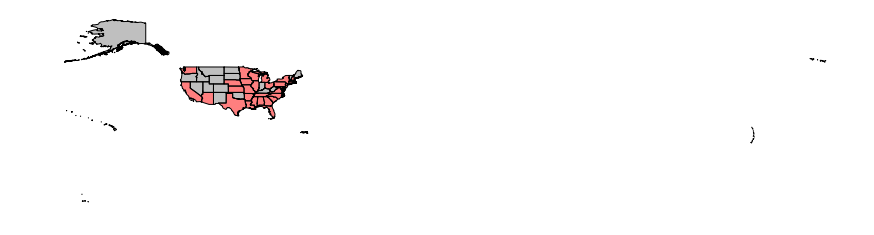

In [19]:
ax = states[states['nuclear_count'] == 0].plot(color='grey', figsize=(15,12))
states[states['nuclear_count'] >= 1].plot(color='red', figsize=(15,12), ax=ax)
ax.axis('off')

##### solar

In [20]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [21]:
states_with_solar = gpd.sjoin(states, powerplants[powerplants['PrimSource'] == 'solar'], how='inner', op='contains')
states_with_solar.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,index_right,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5427,57373,Agua Caliente Solar Project,Agua Caliente Solar,59396,IPP Non-CHP,Dateland,Yuma,85333,67500 East Palomas Rd,solar,347.7,0.0,0.0,0.0,NaN,0.0,0.0,0.0,347.7,0.0,NaN,NaN,Solar = 347.7 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,32.977400,-113.494500
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",6276,58383,Hyder II,Arizona Public Service Co,803,Electric Utility,Hyder,Yuma,85333,75100 E County 14 1/2 St,solar,14.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,14.0,0.0,NaN,NaN,Solar = 14 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,33.027000,-113.348900
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5568,57563,Hyder Solar,Arizona Public Service Co,803,Electric Utility,Hyder,Yuma,85333,75100 E County 14 1/2 St,solar,22.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,22.0,0.0,NaN,NaN,Solar = 22 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,33.025660,-113.343970
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",6124,58213,Saddle Mountain Solar I,SunE AZ2 LLC,58182,IPP Non-CHP,Tonopah,Maricopa,85354,52500 W Baseline Road,solar,15.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,15.0,0.0,NaN,NaN,Solar = 15 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,33.378333,-113.180833
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5761,57790,RE Bagdad Solar I LLC,RE Bagdad Solar 1 LLC,57107,IPP Non-CHP,Bagdad,Yavapai,86321,Terminus of Airport Road,solar,15.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,15.0,0.0,NaN,NaN,Solar = 15 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,34.585833,-113.177222


In [22]:
states_with_solar.groupby('STATEFP').size()

STATEFP
04     57
05      1
06    390
08     31
09      4
10      7
12     17
13     21
15     11
17      3
18     39
20      1
24     25
25    134
26      4
27      2
29      4
31      1
32     19
34    125
35     39
36     29
37    310
39     13
41     11
42     20
44      4
45      1
47      5
48     15
49     16
50     17
51      2
55      1
dtype: int64

In [23]:
states.set_index('STATEFP', inplace=True)

In [24]:
states['solar_count'] = states_with_solar.groupby('STATEFP').size()
states['solar_count'].fillna(0, inplace=True)
states.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATENS,STUSPS,geometry,solar_count
STATEFP,,,,,,,,,,
01,0400000US01,131173688951,4593686489,01,00,Alabama,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",0.0
02,0400000US02,1477946266785,245390495931,02,00,Alaska,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",0.0
04,0400000US04,294198560125,1027346486,04,00,Arizona,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",57.0
05,0400000US05,134771517596,2960191698,05,00,Arkansas,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",1.0
06,0400000US06,403501101370,20466718403,06,00,California,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",390.0


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

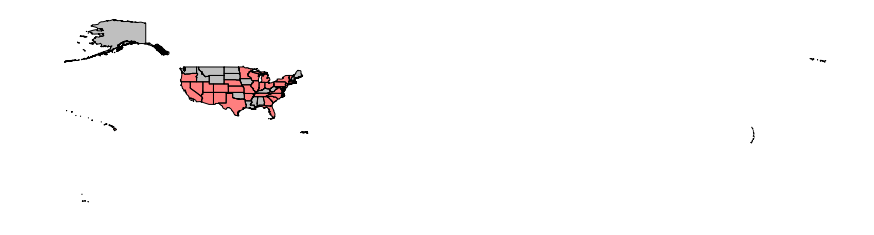

In [25]:
ax = states[states['solar_count'] == 0].plot(color='grey', figsize=(15,12))
states[states['solar_count'] >= 1].plot(color='red', figsize=(15,12), ax=ax)
ax.axis('off')

### 6.	Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.

In [26]:
emissions = pd.read_csv('Total Carbon Dioxide Emissions-StateRankings.csv')
emissions = gpd.GeoDataFrame(emissions)
emissions.crs = {'init': 'epsg:4269'}
emissions.head(6)

,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.
0,1,TX,642.0,NaN
1,2,CA,358.0,NaN
2,3,PA,245.0,NaN
3,4,IL,234.0,NaN
4,5,OH,232.0,NaN
5,6,FL,228.0,NaN


In [27]:
emissions = emissions.merge(states, left_on='State', right_on='STUSPS')
emissions

,Rank,State,"Total Carbon Dioxide Emissions, million metric tons",Note: Rankings are based on the full source data values.,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATENS,STUSPS,geometry,solar_count
0,1,TX,642.0,NaN,0400000US48,676633459408,19025991684,48,00,Texas,01779801,TX,"(POLYGON ((-94.718296 29.728855, -94.717207 29...",15.0
1,2,CA,358.0,NaN,0400000US06,403501101370,20466718403,06,00,California,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",390.0
2,3,PA,245.0,NaN,0400000US42,115882226263,3396805575,42,00,Pennsylvania,01779798,PA,"POLYGON ((-80.519891 40.906661, -80.519091 40....",20.0
3,4,IL,234.0,NaN,0400000US17,143788697679,6206693598,17,00,Illinois,01779784,IL,"POLYGON ((-91.512974 40.181062, -91.511073 40....",3.0
4,5,OH,232.0,NaN,0400000US39,105833122995,10264595056,39,00,Ohio,01085497,OH,"(POLYGON ((-82.73570699999999 41.603361, -82.7...",13.0
5,6,FL,228.0,NaN,0400000US12,138924199212,31386038155,12,00,Florida,00294478,FL,"(POLYGON ((-80.176276 25.525054, -80.173949999...",17.0
6,7,LA,218.0,NaN,0400000US22,111904912452,23746303848,22,00,Louisiana,01629543,LA,"(POLYGON ((-88.8677 29.861551, -88.86565899999...",0.0
7,8,IN,207.0,NaN,0400000US18,92790545247,1536767065,18,00,Indiana,00448508,IN,"POLYGON ((-88.09775999999999 37.904026, -88.09...",39.0
8,9,NY,170.0,NaN,0400000US36,122053048985,19243095591,36,00,New York,01779796,NY,"(POLYGON ((-72.0368298202051 41.2498425393847,...",29.0
9,10,MI,163.0,NaN,0400000US26,146455251245,104031574060,26,00,Michigan,01779789,MI,"(POLYGON ((-83.98756499999999 46.092853, -83.9...",4.0


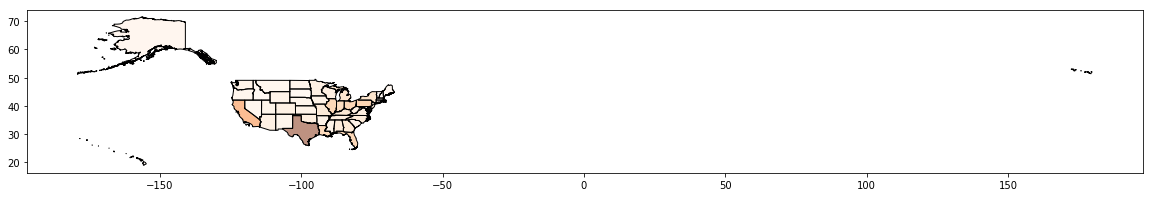

In [28]:
emissions.plot(column='Total Carbon Dioxide Emissions, million metric tons', figsize=(20,20), cmap='Oranges')

#### Hadn't really notice the Total Emissions file, and worked on this question with PM25 file. I'm leaving the code below for reference.

In [29]:
emissions = pd.read_csv('pm25_annual_fixed.csv')
emissions['geometry'] = emissions.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
emissions = gpd.GeoDataFrame(emissions)
emissions.crs = {'init': 'epsg:4269'}
emissions.head(6)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)
5,1,69,3,88101,1,31.224783,-85.390789,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,29,24,N,29,122,0,1,1.0,1.0,Certification not required,0,9.772414,8.039363,47.7,2017-01-13 00:00,18.3,2017-03-05 00:00,15.2,2017-03-17 00:00,13.4,2017-03-23 00:00,NaN,NaN,NaN,NaN,47.7,47.7,18.3,

In [30]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [31]:
emissions_states = gpd.sjoin(emissions, states, how='inner', op='within')
emissions_states.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494),0,0400000US01,131173688951,4593686489,01,00,Alabama

In [32]:
emissions_states.groupby('NAME')['Arithmetic Mean'].mean()

NAME
Alabama                  8.600705
Arizona                  7.126441
Arkansas                 7.344940
California               9.353585
Colorado                 5.868046
Delaware                 6.879896
District of Columbia     8.555833
Georgia                  9.022554
Hawaii                   5.330897
Idaho                    4.524000
Illinois                 8.940669
Indiana                  8.702382
Iowa                     7.761547
Kansas                   7.531491
Kentucky                 6.542209
Maine                    7.061812
Maryland                 6.936176
Michigan                 9.355104
Missouri                10.586364
Nebraska                 6.948247
Nevada                   5.594904
New Mexico               6.390000
New York                 7.159793
North Carolina           7.767338
North Dakota             6.180000
Ohio                     8.475374
Oklahoma                 8.236667
Pennsylvania            10.068889
Rhode Island             6.331694
South Car

In [33]:
states.set_index('NAME', inplace=True)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [34]:
states['emissions_mean'] = emissions_states.groupby('NAME')['Arithmetic Mean'].mean()
states.head(3)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,emissions_mean
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",8.600705
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",NaN
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",7.126441


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

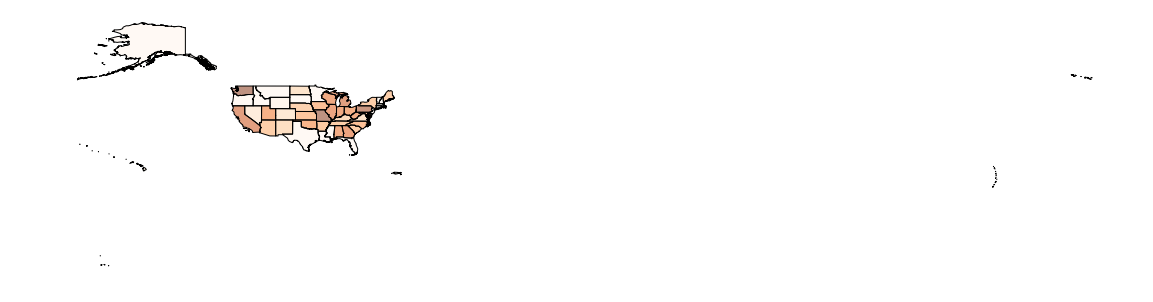

In [35]:
ax = states.plot(column='emissions_mean', cmap='Oranges', figsize=(20,20))
ax.axis('off')

### 7.	Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [36]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [37]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [38]:
powerplants_total = gpd.sjoin(powerplants, states, how='inner', op='within')
powerplants_total.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [39]:
powerplants_total.groupby('NAME')['Total_MW'].sum()

NAME
Alabama                  29654.0
Alaska                    2616.5
Arizona                  27083.4
Arkansas                 14706.7
California               76586.9
Colorado                 15807.9
Connecticut               8784.9
Delaware                  3404.4
District of Columbia        21.0
Florida                  59468.9
Georgia                  36569.5
Hawaii                    2688.5
Idaho                     5393.4
Illinois                 45179.9
Indiana                  25707.3
Iowa                     16342.3
Kansas                   14756.3
Kentucky                 20100.7
Louisiana                26386.5
Maine                     4633.8
Maryland                 12282.4
Massachusetts            13233.0
Michigan                 29112.1
Minnesota                15915.0
Mississippi              16084.5
Missouri                 21542.3
Montana                   6198.5
Nebraska                  8696.9
Nevada                   12092.3
New Hampshire             4547.8
New J

In [40]:
states.set_index('NAME', inplace=True)

In [41]:
states['total_energy'] = powerplants_total.groupby('NAME')['Total_MW'].sum()
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,total_energy
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",2616.5


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

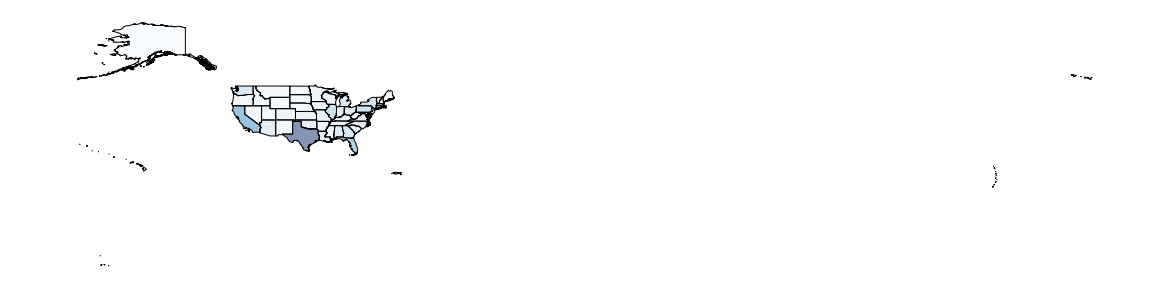

In [42]:
ax = states.plot(column='total_energy', cmap='Blues', figsize=(20,20))
ax.axis('off')

### 8.	Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

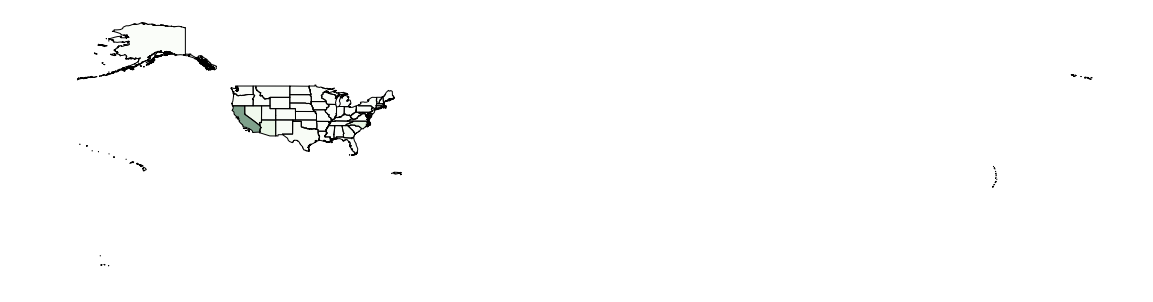

In [43]:
states['total_solar'] = powerplants_total.groupby('NAME')['Solar_MW'].sum()
ax = states.plot(column='total_solar', cmap='Greens', figsize=(20,20))
ax.axis('off')

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

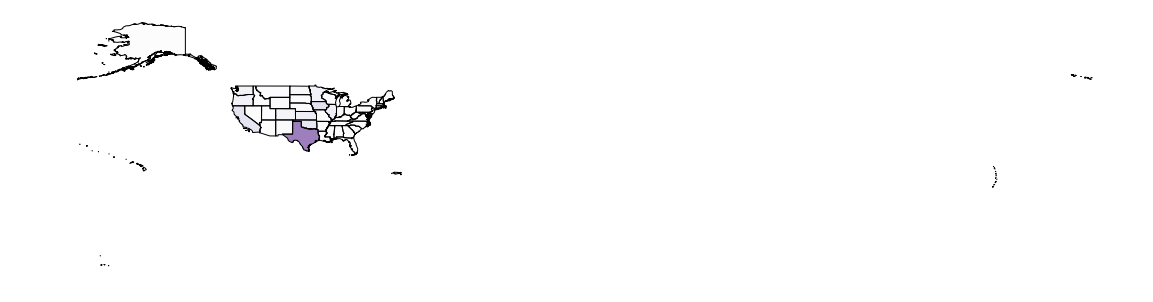

In [44]:
states['total_wind'] = powerplants_total.groupby('NAME')['Wind_MW'].sum()
ax = states.plot(column='total_wind', cmap='Purples', figsize=(20,20))
ax.axis('off')

(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

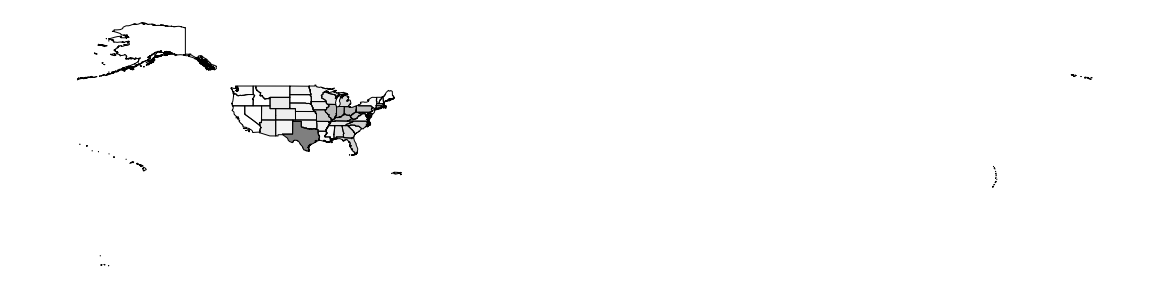

In [45]:
states['total_coal'] = powerplants_total.groupby('NAME')['Coal_MW'].sum()
ax = states.plot(column='total_coal', cmap='Greys', figsize=(20,20))
ax.axis('off')

### 9.	Make a map of average air quality of each states, with high quality being light red and low quality being dark red

In [46]:
air = pd.read_csv('pm25_annual_fixed.csv')
air['geometry'] = air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air = gpd.GeoDataFrame(air)
air.crs = {'init': 'epsg:4269'}
air.head(6)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)
5,1,69,3,88101,1,31.224783,-85.390789,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,29,24,N,29,122,0,1,1.0,1.0,Certification not required,0,9.772414,8.039363,47.7,2017-01-13 00:00,18.3,2017-03-05 00:00,15.2,2017-03-17 00:00,13.4,2017-03-23 00:00,NaN,NaN,NaN,NaN,47.7,47.7,18.3,

In [47]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [48]:
air_states = gpd.sjoin(air, states, how='inner', op='within')
air_states.head(5)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494),0,0400000US01,131173688951,4593686489,01,00,Alabama

In [49]:
states.set_index('NAME', inplace=True)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [50]:
air_states.groupby('NAME')['Arithmetic Mean'].mean()

NAME
Alabama                  8.600705
Arizona                  7.126441
Arkansas                 7.344940
California               9.353585
Colorado                 5.868046
Delaware                 6.879896
District of Columbia     8.555833
Georgia                  9.022554
Hawaii                   5.330897
Idaho                    4.524000
Illinois                 8.940669
Indiana                  8.702382
Iowa                     7.761547
Kansas                   7.531491
Kentucky                 6.542209
Maine                    7.061812
Maryland                 6.936176
Michigan                 9.355104
Missouri                10.586364
Nebraska                 6.948247
Nevada                   5.594904
New Mexico               6.390000
New York                 7.159793
North Carolina           7.767338
North Dakota             6.180000
Ohio                     8.475374
Oklahoma                 8.236667
Pennsylvania            10.068889
Rhode Island             6.331694
South Car

In [51]:
states['avg_air_q'] = air_states.groupby('NAME')['Arithmetic Mean'].mean()
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,avg_air_q
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",8.600705
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",NaN


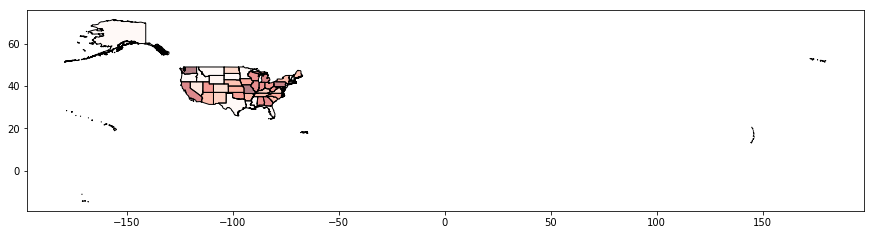

In [52]:
# Low air quality = high concentration of PM2.5
# So, darker states should be California, Washington, Pennsylvania, Missouri etc.
states.plot(column='avg_air_q', cmap='Reds', figsize=(15,15))

### 10.	Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

In [53]:
worst_air = pd.read_csv('pm25_annual_fixed.csv')
worst_air['geometry'] = worst_air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
worst_air = gpd.GeoDataFrame(worst_air)
worst_air.crs = {'init': 'epsg:4269'}
worst_air.head(6)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,7.650000,3.731113,17.8,2017-03-05 00:00,14.8,2017-02-18 00:00,13.9,2017-02-21 00:00,11.8,2017-03-23 00:00,NaN,NaN,NaN,NaN,17.8,17.8,14.8,13.9,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,8.083333,3.146436,14.8,2017-03-05 00:00,14.6,2017-02-18 00:00,13.1,2017-02-21 00:00,12.3,2017-01-16 00:00,NaN,NaN,NaN,NaN,14.8,14.8,14.6,13.1,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,30,25,N,30,122,0,0,0.0,0.0,Certification not required,0,9.073333,4.340660,17.5,2017-01-16 00:00,16.7,2017-03-05 00:00,16.0,2017-02-18 00:00,15.6,2017-02-21 00:00,NaN,NaN,NaN,NaN,17.5,17.5,16.7,16.0,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)
5,1,69,3,88101,1,31.224783,-85.390789,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,29,24,N,29,122,0,1,1.0,1.0,Certification not required,0,9.772414,8.039363,47.7,2017-01-13 00:00,18.3,2017-03-05 00:00,15.2,2017-03-17 00:00,13.4,2017-03-23 00:00,NaN,NaN,NaN,NaN,47.7,47.7,18.3,

In [54]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [55]:
worst_air_states = gpd.sjoin(worst_air, states, how='inner', op='within')
worst_air_states.tail(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
438,56,37,7,88101,1,41.591613,-109.220722,WGS84,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017,Micrograms/cubic meter (LC),No Events,15,25,N,15,61,0,0,0.0,0.0,Certification not required,0,6.460000,6.457642,23.0,2017-01-19 00:00,20.8,2017-01-07 00:00,6.6,2017-01-25 00:00,6.3,2017-03-14 00:00,NaN,NaN,NaN,NaN,23.0,23.0,23.0,20.8,6.3,4.7,2.4,Rock Springs SLAM site,625 AHSAY AVE ROCK SPRINGS WYO,Wyoming,Sweetwater,Rock Springs,"Rock Springs, WY",2017-05-16,POINT (-109.220722 41.591613),31,0400000US56,251464935120,1861273298,56,00,Wyoming,56,01779807,WY
439,56,39,1006,88101,1,43.457760,-110.797990,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2000 PM-2.5 Air Sampler w/VSCC - G...,2017,Micrograms/cubic meter (LC),No Events,13,21,N,13,61,0,2,0.0,0.0,Certification not required,0,4.007692,4.390987,15.3,2017-01-13 00:00,11.4,2017-01-19 00:00,5.4,2017-02-12 00:00,3.6,2017-01-25 00:00,NaN,NaN,NaN,NaN,15.3,15.3,15.3,11.4,3.6,2.4,1.1,Jackson SLAM site,Jackson Fire District #1- 40 East Peral Ave,Wyoming,Teton,Jackson,"Jackson, WY-ID",2017-05-16,POINT (-110.79799 43.45776),31,0400000US56,251464935120,1861273298,56,00,Wyoming,56,01779807,WY
440,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,PM25 24-hour 2012,Daily Mean,NaN,2017,Micrograms/cubic meter (LC),No Events,90,25,N,90,365,0,0,0.0,0.0,Certification not required,0,3.722222,2.199018,9.0,2017-03-18 00:00,7.5,2017-03-17 00:00,7.5,2017-03-24 00:00,7.4,2017-03-05 00:00,NaN,NaN,NaN,NaN,9.0,7.5,7.2,6.7,5.8,3.2,1.2,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,NaN,"Jackson, WY-ID",2017-05-24,POINT (-110.830833 44.373056),31,0400000US56,251464935120,1861273298,56,00,Wyoming,56,01779807,WY


In [56]:
states.set_index('NAME', inplace=True)
states.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."


In [57]:
worst_air_states.groupby('NAME')['1st Max Value'].mean()

NAME
Alabama                 20.505556
Arizona                 14.425000
Arkansas                14.640000
California              22.758333
Colorado                18.190909
Delaware                16.885714
District of Columbia    17.900000
Georgia                 19.633333
Hawaii                  13.920000
Idaho                   15.800000
Illinois                21.604000
Indiana                 21.058065
Iowa                    19.314286
Kansas                  18.712500
Kentucky                11.800000
Maine                   15.666667
Maryland                17.740000
Michigan                28.061538
Missouri                24.300000
Nebraska                17.616667
Nevada                  22.440000
New Mexico              15.500000
New York                15.057143
North Carolina          17.275000
North Dakota            13.800000
Ohio                    21.509091
Oklahoma                19.800000
Pennsylvania            29.000000
Rhode Island            16.760000
South Car

In [58]:
states['worst_air_q'] = worst_air_states.groupby('NAME')['1st Max Value'].mean()
states.head(1)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,worst_air_q
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",20.505556


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

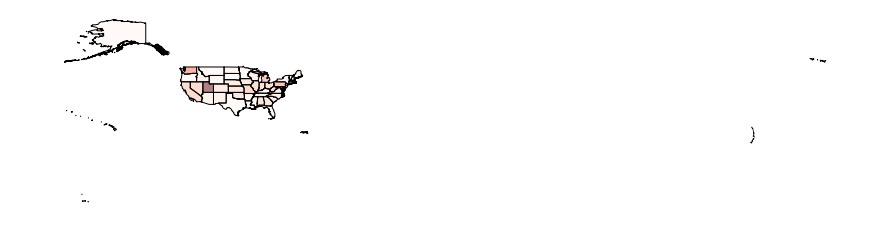

In [59]:
ax = states.plot(column='worst_air_q', cmap='Reds', figsize=(15,15))
ax.axis('off')

### 11.	Map of average PM2.5 measurement by county

In [60]:
# Source: https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html
counties = gpd.read_file('cb_2016_us_county_500k/cb_2016_us_county_500k.shp')
counties.crs

{'init': 'epsg:4269'}

In [61]:
avg_air = pd.read_csv('pm25_annual_fixed.csv')
avg_air['geometry'] = avg_air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
avg_air = gpd.GeoDataFrame(avg_air)
avg_air.crs = {'init': 'epsg:4269'}
avg_air.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)


In [62]:
avg_air_counties = gpd.sjoin(avg_air, counties, how='inner', op='within')
avg_air_counties.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Metric Used,Method Name,Year,Units of Measure,Event Type,Observation Count,Observation Percent,Completeness Indicator,Valid Day Count,Required Day Count,Exceptional Data Count,Null Data Count,Primary Exceedance Count,Secondary Exceedance Count,Certification Indicator,Num Obs Below MDL,Arithmetic Mean,Arithmetic Standard Dev,1st Max Value,1st Max DateTime,2nd Max Value,2nd Max DateTime,3rd Max Value,3rd Max DateTime,4th Max Value,4th Max DateTime,1st Max Non Overlapping Value,1st NO Max DateTime,2nd Max Non Overlapping Value,2nd NO Max DateTime,99th Percentile,98th Percentile,95th Percentile,90th Percentile,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry,index_right,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,28,23,N,28,122,0,2,0.0,0.0,Certification not required,0,6.535714,2.802012,15.4,2017-03-23 00:00,11.9,2017-03-20 00:00,10.5,2017-03-05 00:00,9.2,2017-03-11 00:00,NaN,NaN,NaN,NaN,15.4,15.4,11.9,10.5,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478),19,0500000US01003,4117584019,1133130502,003,00161527,01003,06,Baldwin,01
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,PM25 24-hour 2012,Daily Mean,R & P Model 2025 PM-2.5 Sequential Air Sampler...,2017,Micrograms/cubic meter (LC),No Events,27,22,N,27,122,0,5,0.0,0.0,Certification not required,0,8.851852,4.694708,19.0,2017-03-17 00:00,17.4,2017-02-18 00:00,16.3,2017-02-21 00:00,15.0,2017-03-20 00:00,NaN,NaN,NaN,NaN,19.0,19.0,17.4,16.3,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928),1230,0500000US01027,1564252455,5284573,027,00161539,01027,06,Clay,01


In [63]:
counties.set_index('NAME', inplace=True)
counties.head(2)

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry
NAME,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910..."


In [64]:
avg_air_counties.groupby('NAME')['Arithmetic Mean'].mean()

NAME
Albany             5.661977
Albemarle          5.727586
Allegan            8.967857
Allegheny         10.068889
Allen              8.615000
Androscoggin       8.925000
Arapahoe           5.451852
Arkansas           6.418519
Arlington          6.913333
Aroostook          7.503572
Ashland            3.600000
Ashley             6.920690
Athens             6.028571
Baldwin            6.535714
Baltimore          7.242634
Bartholomew        7.936667
Bay                7.993333
Bell               6.366667
Belmont            7.740000
Berrien            8.890000
Bibb               9.581579
Black Hawk         7.593333
Blount             6.961111
Boulder            5.848074
Box Elder          9.649515
Boyd               6.790909
Bristol            6.596429
Bronx              8.991162
Brooke             8.708334
Brown             13.075000
                    ...    
Taylor             6.883333
Teton              3.864957
Tippecanoe         8.670000
Tooele             5.569492
Trego          

In [65]:
counties['avg_air'] = avg_air_counties.groupby('NAME')['Arithmetic Mean'].mean()
counties.head(2)

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,avg_air
NAME,,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",NaN
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",9.307143


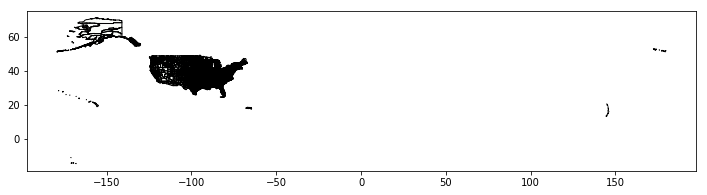

In [66]:
counties.plot(column='avg_air', cmap='Greens', figsize=(12,12))

##### Continental-only for a better view

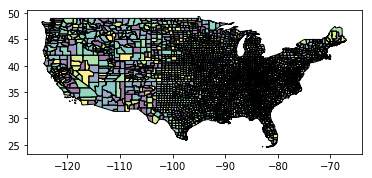

In [67]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_counties = counties[counties.within(continental_box)]
continental_counties.plot()

In [68]:
continental_counties.head(2)

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,STATEFP,geometry,avg_air
NAME,,,,,,,,,,
Keokuk,0500000US19107,1500067253,1929323,107,00465242,19107,06,19,"POLYGON ((-92.41199499999999 41.509548, -92.35...",NaN
Winnebago,0500000US19189,1037261946,3182052,189,00465283,19189,06,19,"POLYGON ((-93.97076 43.499605, -93.88843009910...",9.307143


In [69]:
continental_counties.avg_air.fillna(0, inplace=True)
continental_counties.avg_air

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


NAME
Keokuk         0.000000
Winnebago      9.307143
Kearny         0.000000
Mitchell       0.000000
Stanton        0.000000
Anderson       0.000000
Bullitt        0.000000
Clark          7.081793
Daviess        7.109091
Elliott        0.000000
Hardin         6.536364
Harrison       0.000000
Hopkins        0.000000
Leslie         0.000000
McCreary       0.000000
Madison        8.116011
Marion         9.565058
Morgan         7.396429
Autauga        0.000000
Baldwin        6.535714
Clarke         8.530000
DeKalb         8.913666
Fayette        6.563636
Jefferson      8.777370
Mobile         7.635714
Montgomery     8.058889
Wilcox         0.000000
Apache         0.000000
Gila           0.000000
La Paz         0.000000
                ...    
Alleghany      0.000000
Catawba        0.000000
Schuyler       0.000000
Warrick        0.000000
Brown         13.075000
Highland       0.000000
Madison        8.116011
Carroll        0.000000
Jeff Davis     0.000000
Creek          0.000000
Roseau     

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

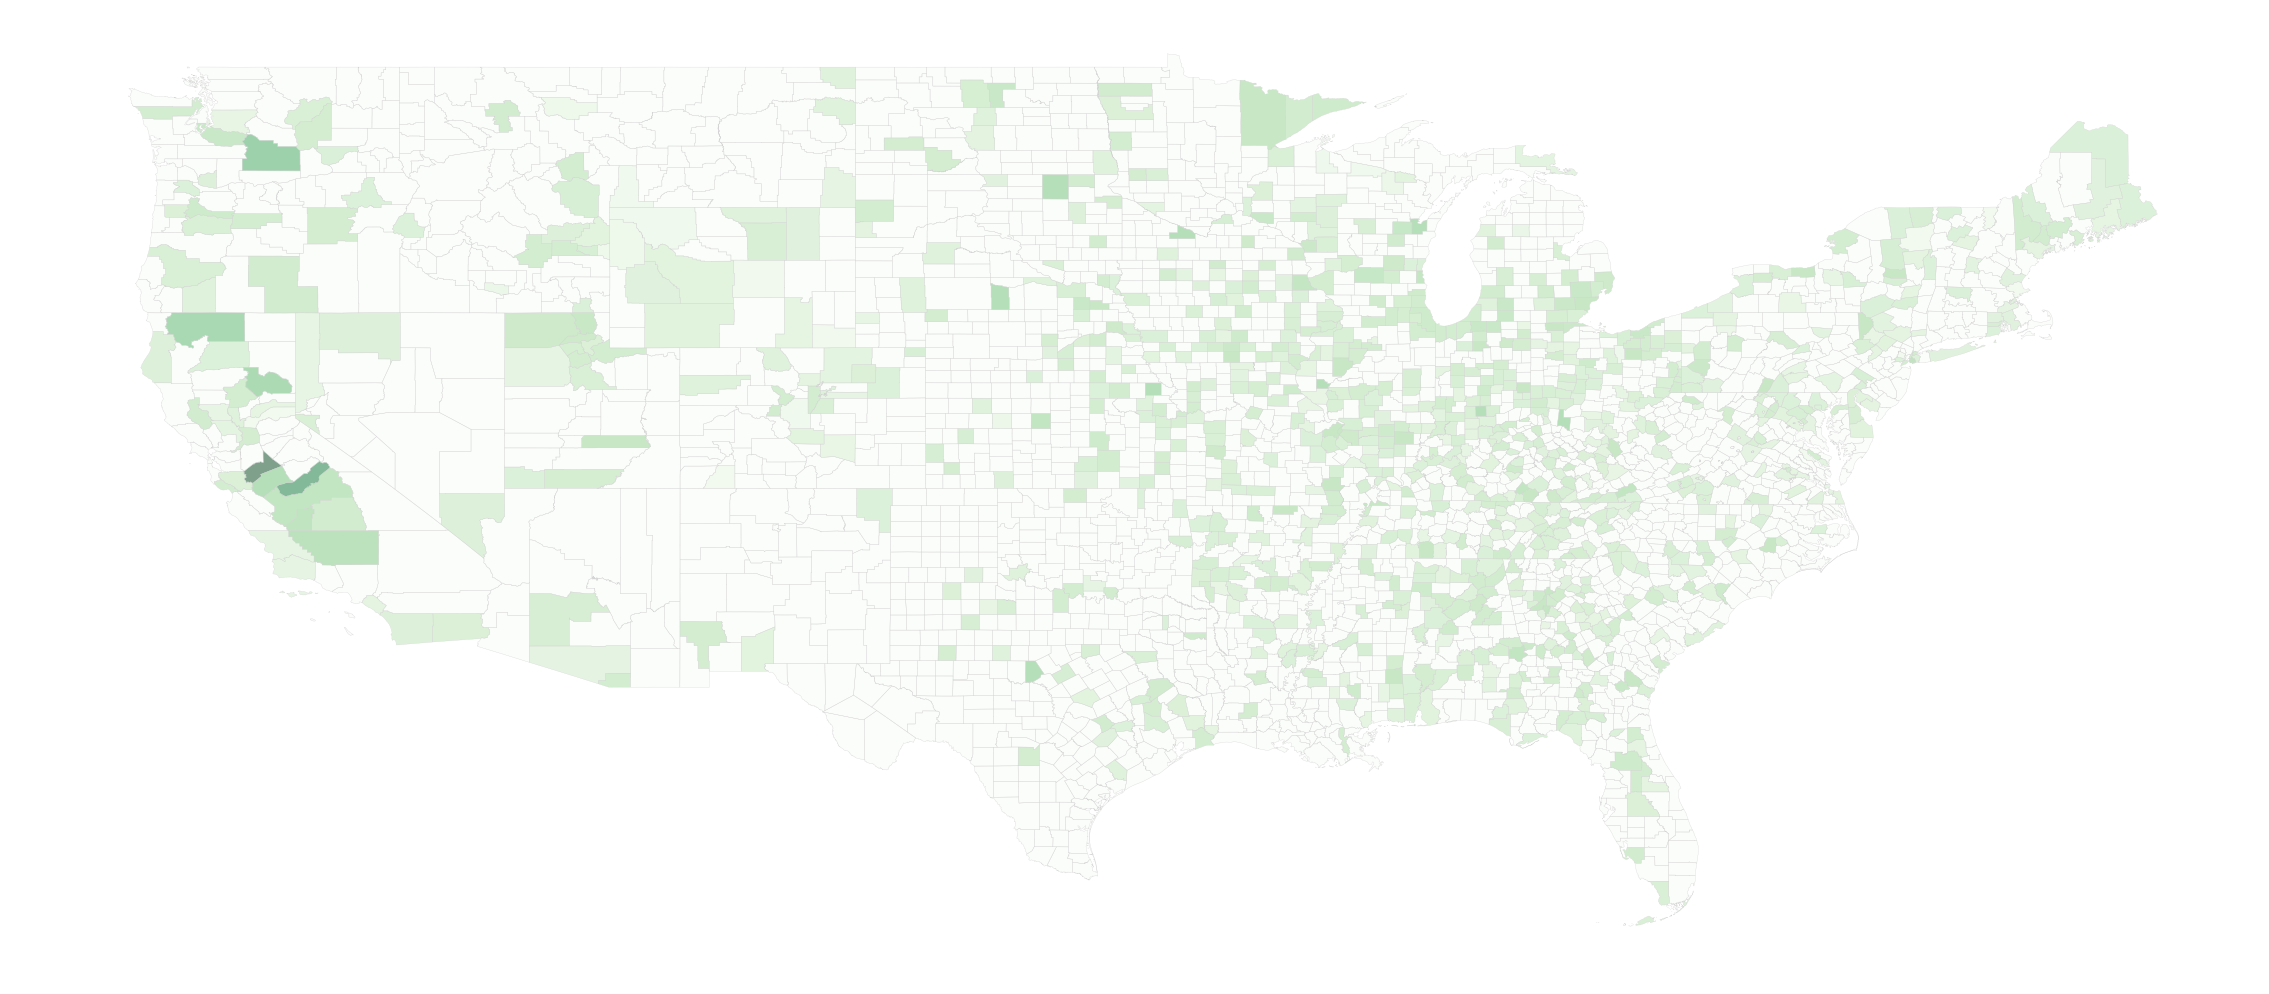

In [70]:
ax = continental_counties.plot(column='avg_air', cmap='Greens', figsize=(40,20), edgecolor='lightgrey', linewidth=0.3)
ax.axis('off')

### 12.	Make a map with color coded power plants, and a 100 mile circle about major American cities.

In [71]:
# Source: https://gist.github.com/Miserlou/c5cd8364bf9b2420bb29
major_cities = pd.read_json('1000 Largest US Cities By Population With Geographic Coordinates.json')
major_cities['geometry'] = major_cities.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
major_cities = gpd.GeoDataFrame(major_cities)
major_cities.crs = {'init': 'epsg:4269'}
major_cities.head(2)

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state,geometry
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York,POINT (-74.0059413 40.7127837)
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California,POINT (-118.2436849 34.0522342)


In [72]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


###### Lazy way, converting miles to degrees

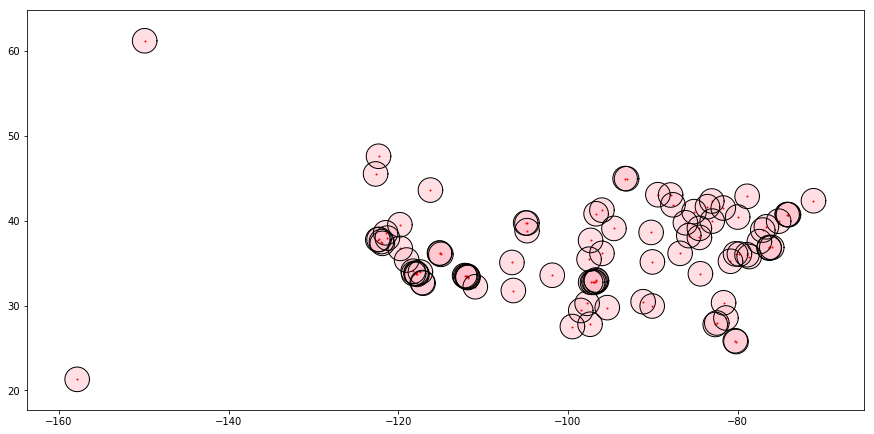

In [73]:
# 1 degree of lat = 69 miles
# 100/69 miles = 1.44927536232 degrees
# Source: https://www2.usgs.gov/faq/categories/9794/3022
# How much distance does a degree, minute and second cover on your maps?
# The distances vary. A degree, minute or second of latitude remains fairly constant from the equator to the poles;
# however a degree, minute, or second of longitude can vary greatly as one approaches the poles 
# (because of the convergence of the meridians). At 38 degrees North latitude, one degree of latitude equals
# approximately 364,000 ft (69 miles), one minute equals 6068 ft (1.15 miles), one-second equals 101 ft;
# one-degree of longitude equals 288,200 ft (54.6 miles), one minute equals 4800 ft (0.91 mile),
# and one second equals 80 ft.

ax = major_cities[:99].plot(figsize=(15,15), color='red', markersize=1)
major_cities[:99].buffer(1.44927536232).plot(ax=ax, color='pink')

In [74]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

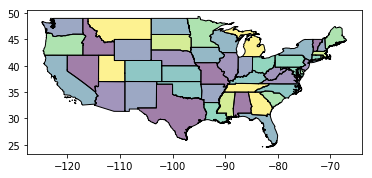

In [76]:
continental_bounds = [
            [
              -128.671875,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              22.268764039073968
            ],
            [
              -61.87499999999999,
              50.28933925329178
            ],
            [
              -128.671875,
              50.28933925329178
            ],
            [
              -128.671875,
              22.268764039073968
            ]
        ]

continental_box = Polygon(continental_bounds)
continental_states = states[states.within(continental_box)]
continental_states.plot()

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

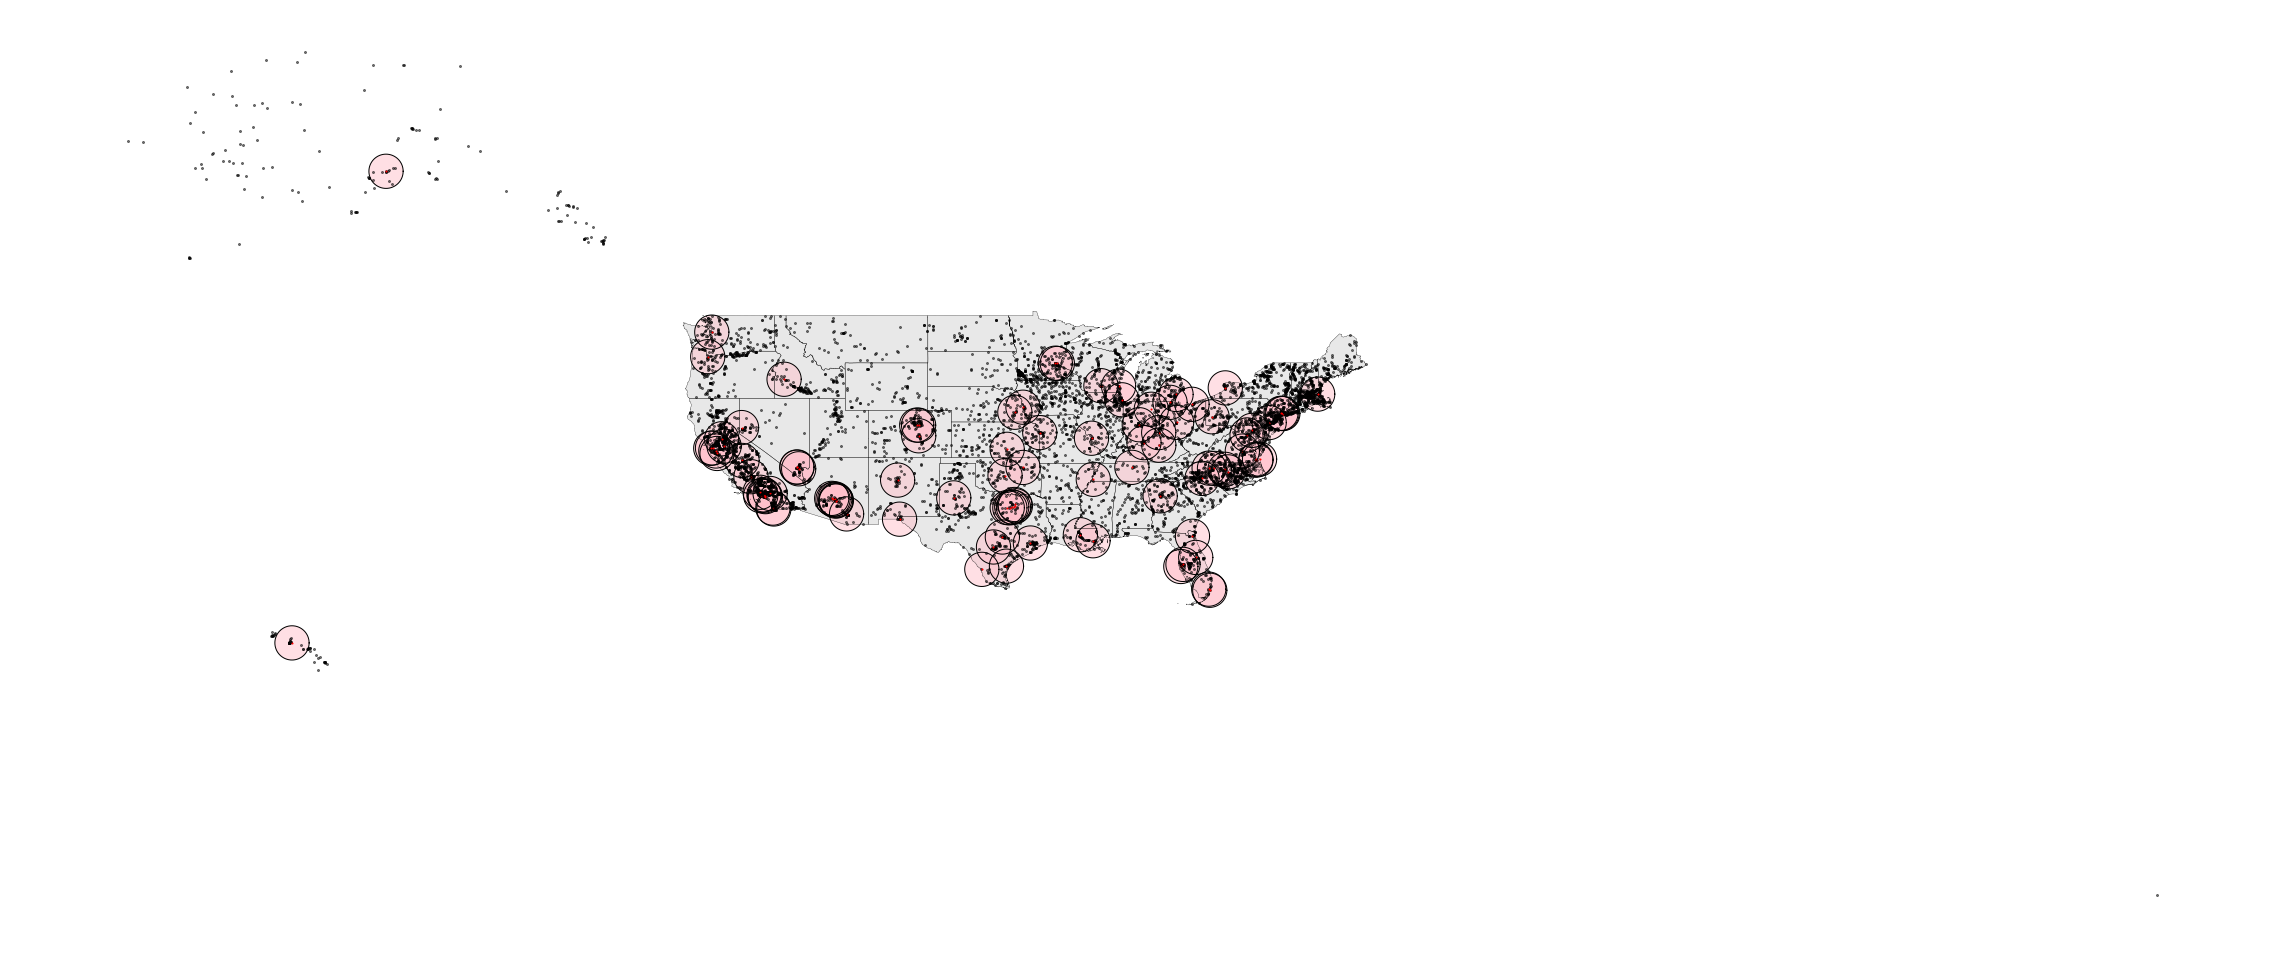

In [77]:
ax = continental_states.plot(figsize=(40,20), color='lightgrey', edgecolor='black', linewidth=0.3)
powerplants.plot(ax=ax, color='black', alpha=0.5)
major_cities[:99].plot(figsize=(15,15), color='red', markersize=1, ax=ax)
major_cities[:99].buffer(1.44927536232).plot(ax=ax, color='pink')
ax.axis('off')

(-180.29806094999998, 8.5856219500000002, -3.5646000000000004, 74.8566)

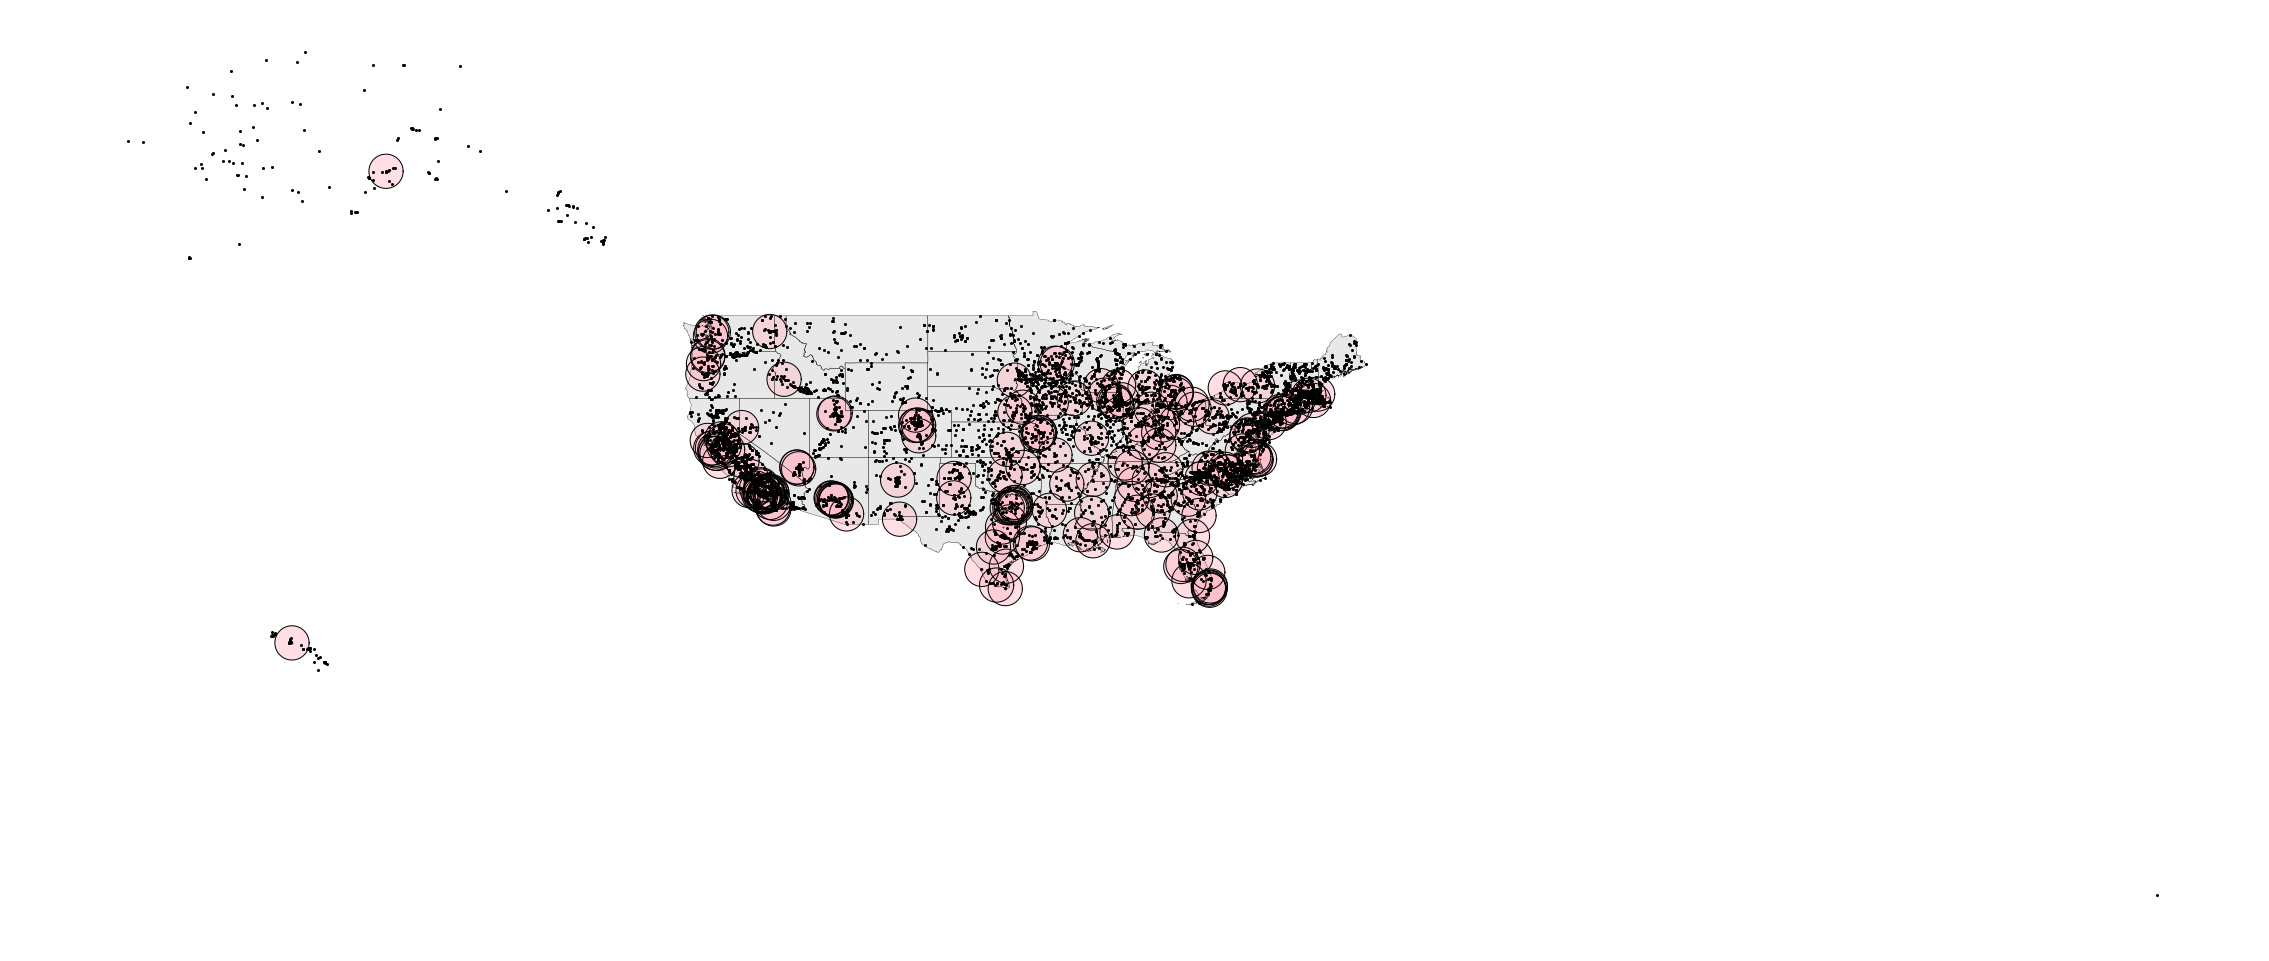

In [78]:
ax = continental_states.plot(figsize=(40,20), color='lightgrey', edgecolor='black', linewidth=0.3)
major_cities[:199].plot(figsize=(15,15), color='red', markersize=1, ax=ax)
major_cities[:199].buffer(1.44927536232).plot(ax=ax, color='pink')
powerplants.plot(ax=ax, color='black')
ax.axis('off')

###### Reprojecting for using meters-miles

In [79]:
continental_states.to_crs({'proj':'merc'}, inplace=True)
continental_states.head(2)

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((-9802056.867629165 3547198.51410046...
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-12781291.38285079 3807223.522069516...


In [80]:
powerplants.to_crs({'proj':'merc'}, inplace=True)
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-9724517.053678129 3932786.803759655)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-9797261.780563245 3611636.898879569)


In [81]:
major_cities.to_crs({'proj':'merc'}, inplace=True)
major_cities.head(2)

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state,geometry
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York,POINT (-8238303.701192894 4942192.393490919)
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California,POINT (-13162826.79258829 4011892.7159494)


(-20070688.335968602,
 955747.06361755251,
 -573116.87857991387,
 12035454.450178206)

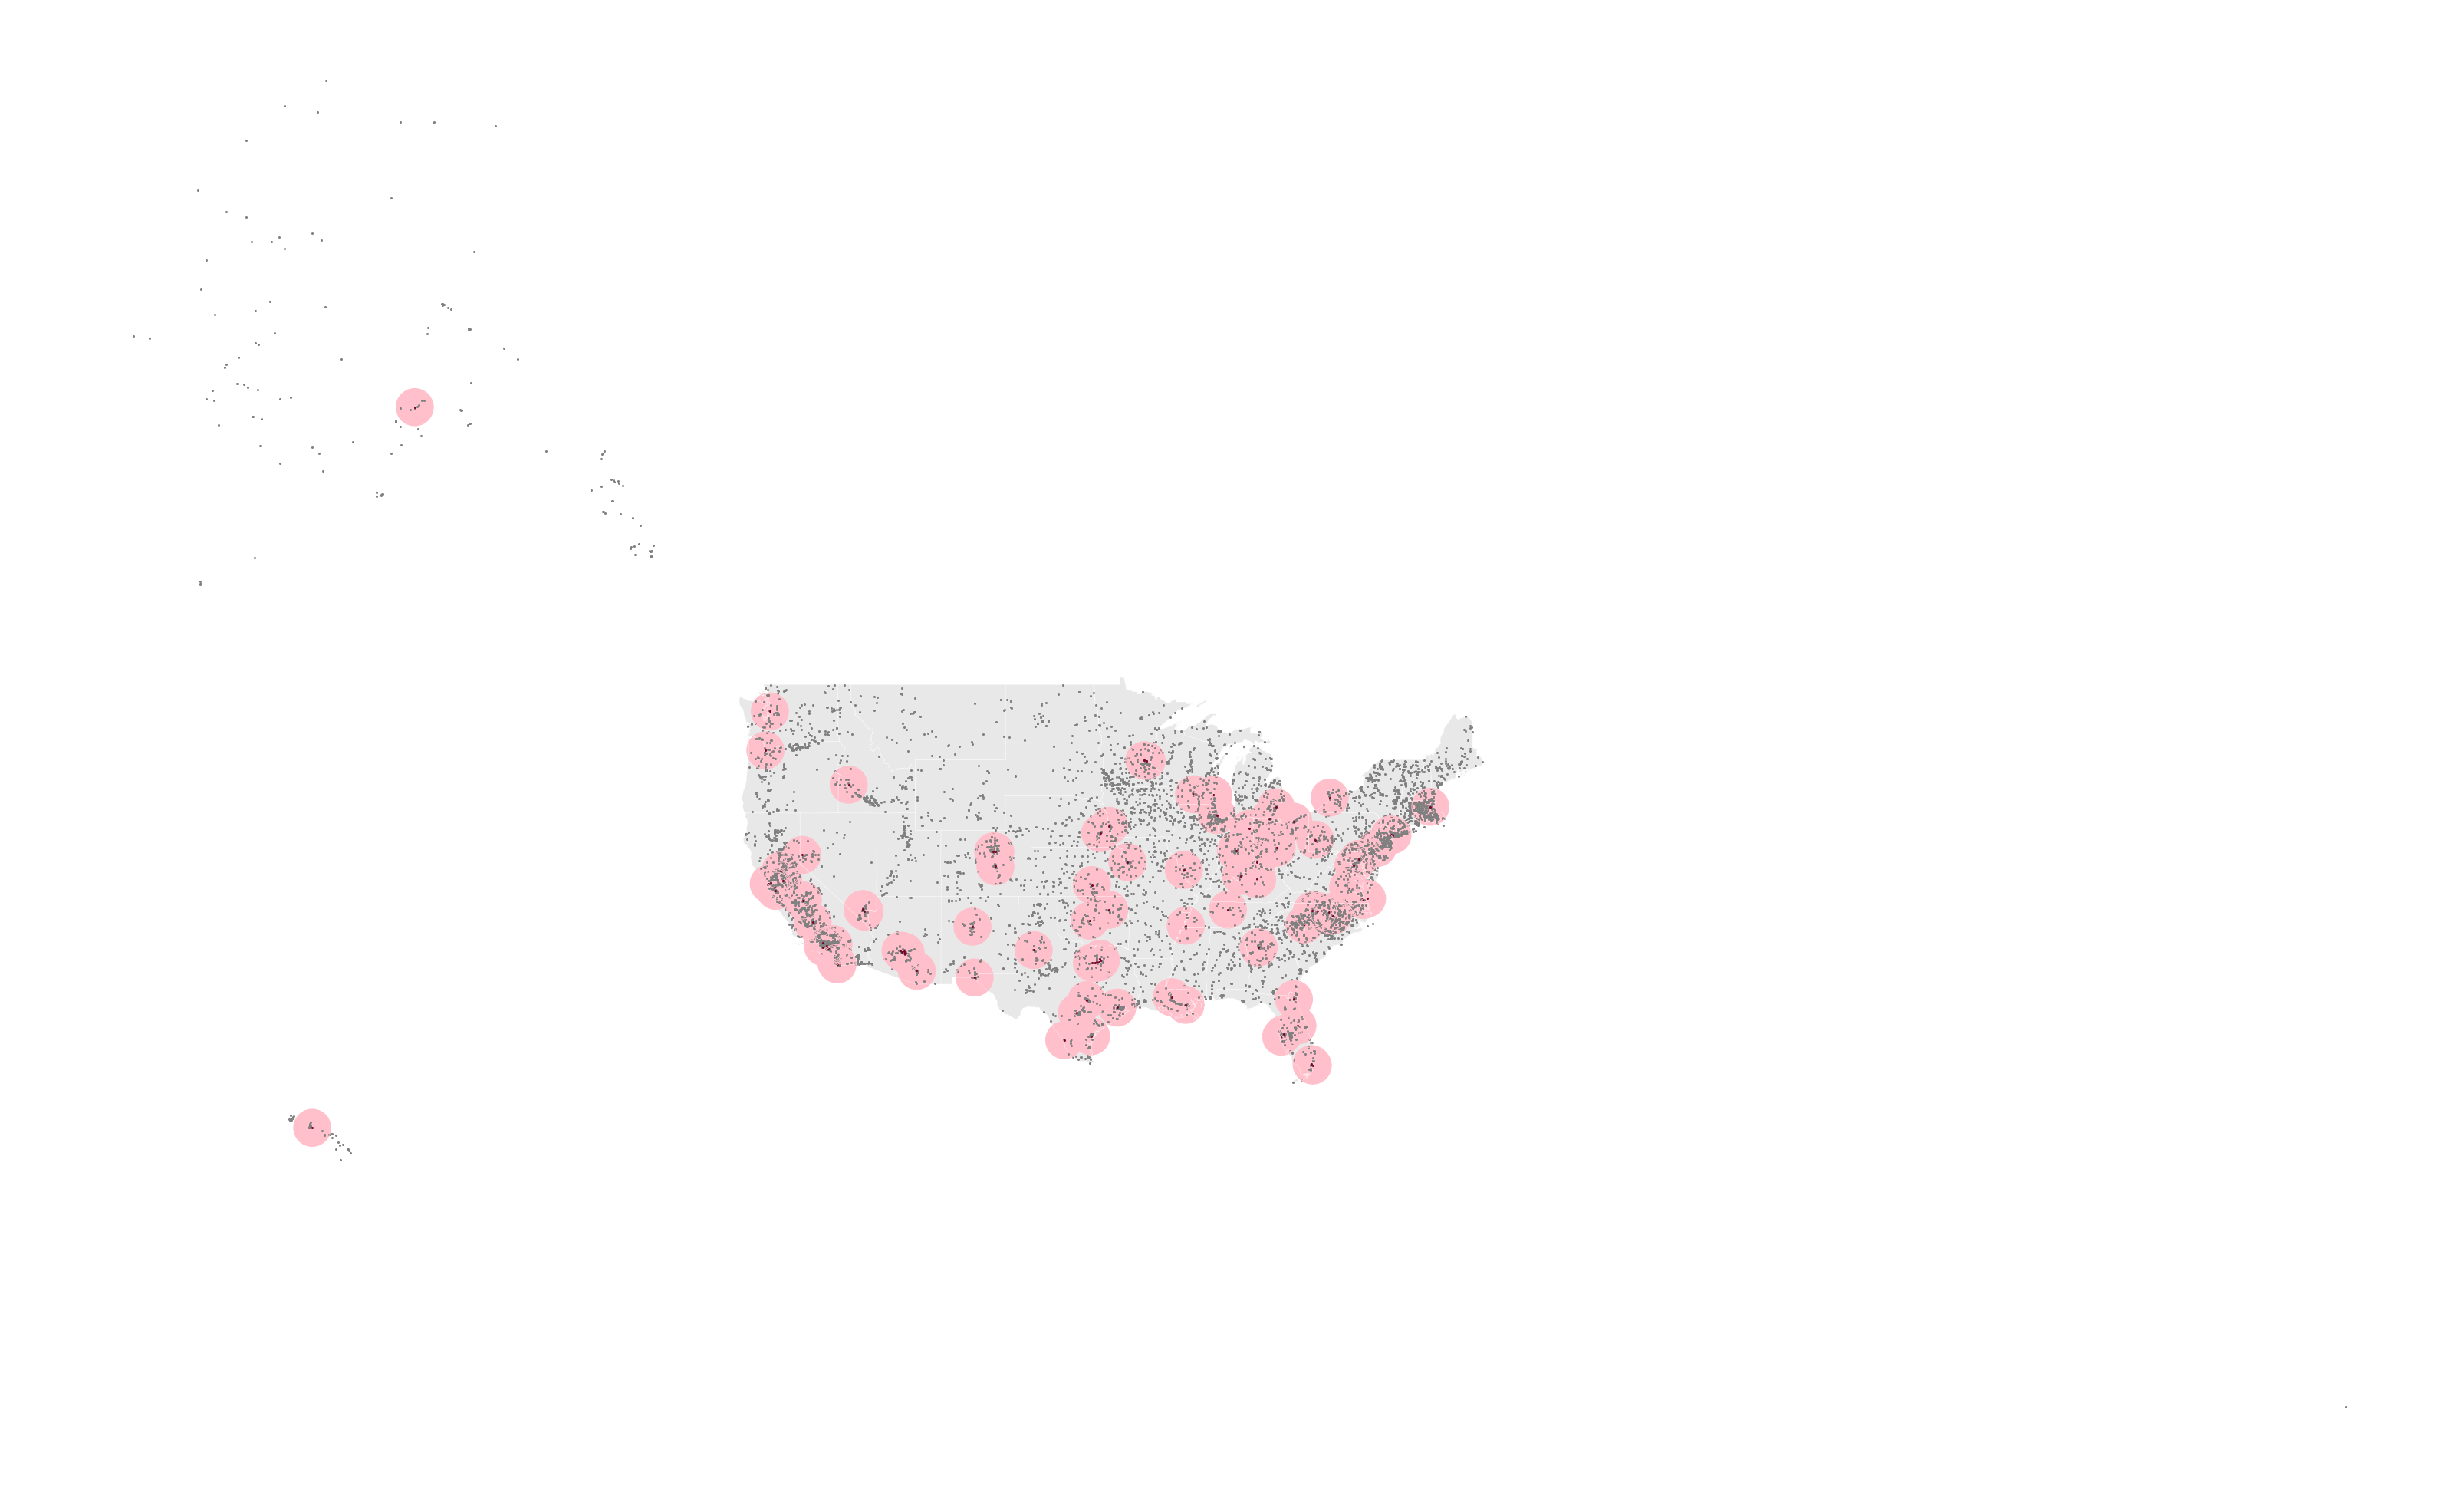

In [82]:
ax = continental_states.plot(color='lightgrey', edgecolor='white', linewidth=0.25, figsize=(60,35))
powerplants.plot(color='grey', ax=ax)
major_cities[:99].plot(color='#78072C', ax=ax)
# 100 miles = 160934 meters
major_cities[:99].buffer(160934).plot(color='pink', edgecolor='pink', alpha=1, ax=ax)
ax.axis('off')

### 13.	Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [83]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.crs

{'init': 'epsg:4269'}

In [84]:
powerplants = pd.read_csv('powerplants.csv')
powerplants['geometry'] = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(powerplants)
powerplants.crs = {'init': 'epsg:4269'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [85]:
powerplants['renewables_total'] = powerplants.Hydro_MW + powerplants.Solar_MW + powerplants.Wind_MW
powerplants['renewables_pc'] = (powerplants.renewables_total / powerplants.Total_MW) * 100
powerplants.head(3)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,renewables_total,renewables_pc
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),56.0,100.0
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0.0,0.0
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889),225.9,100.0


In [86]:
powerplants_w_states = gpd.sjoin(powerplants, states, how='inner', op='within')
powerplants_w_states.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,renewables_total,renewables_pc,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),56.0,100.0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0.0,0.0,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [87]:
powerplants_w_states.groupby('NAME')['renewables_total'].sum()

NAME
Alabama                  3232.2
Alaska                    498.7
Arizona                  3517.0
Arkansas                 1278.2
California              24054.0
Colorado                 3845.7
Connecticut               135.4
Delaware                   32.7
District of Columbia        0.0
Florida                   147.2
Georgia                  2557.6
Hawaii                    281.3
Idaho                    4115.4
Illinois                 4007.2
Indiana                  2169.9
Iowa                     6185.5
Kansas                   3854.7
Kentucky                 1022.5
Louisiana                 192.0
Maine                    1382.5
Maryland                  864.9
Massachusetts             686.4
Michigan                 1663.4
Minnesota                3639.3
Mississippi                 0.0
Missouri                 1018.7
Montana                  3411.1
Nebraska                 1203.0
Nevada                   3370.2
New Hampshire             784.4
New Jersey                467.9
New

In [88]:
powerplants_w_states.groupby('NAME')['Total_MW'].sum()

NAME
Alabama                  29654.0
Alaska                    2616.5
Arizona                  27083.4
Arkansas                 14706.7
California               76586.9
Colorado                 15807.9
Connecticut               8784.9
Delaware                  3404.4
District of Columbia        21.0
Florida                  59468.9
Georgia                  36569.5
Hawaii                    2688.5
Idaho                     5393.4
Illinois                 45179.9
Indiana                  25707.3
Iowa                     16342.3
Kansas                   14756.3
Kentucky                 20100.7
Louisiana                26386.5
Maine                     4633.8
Maryland                 12282.4
Massachusetts            13233.0
Michigan                 29112.1
Minnesota                15915.0
Mississippi              16084.5
Missouri                 21542.3
Montana                   6198.5
Nebraska                  8696.9
Nevada                   12092.3
New Hampshire             4547.8
New J

In [89]:
states.set_index('NAME', inplace=True)
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [90]:
states['energy_total'] = powerplants_w_states.groupby('NAME')['Total_MW'].sum()
states['renewable_total'] = powerplants_w_states.groupby('NAME')['renewables_total'].sum()
states['renewable_pc'] = (states['renewable_total'] / states['energy_total']) * 100
states.head(3)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,energy_total,renewable_total,renewable_pc
NAME,,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",29654.0,3232.2,10.899710
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",2616.5,498.7,19.059813
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",27083.4,3517.0,12.985814


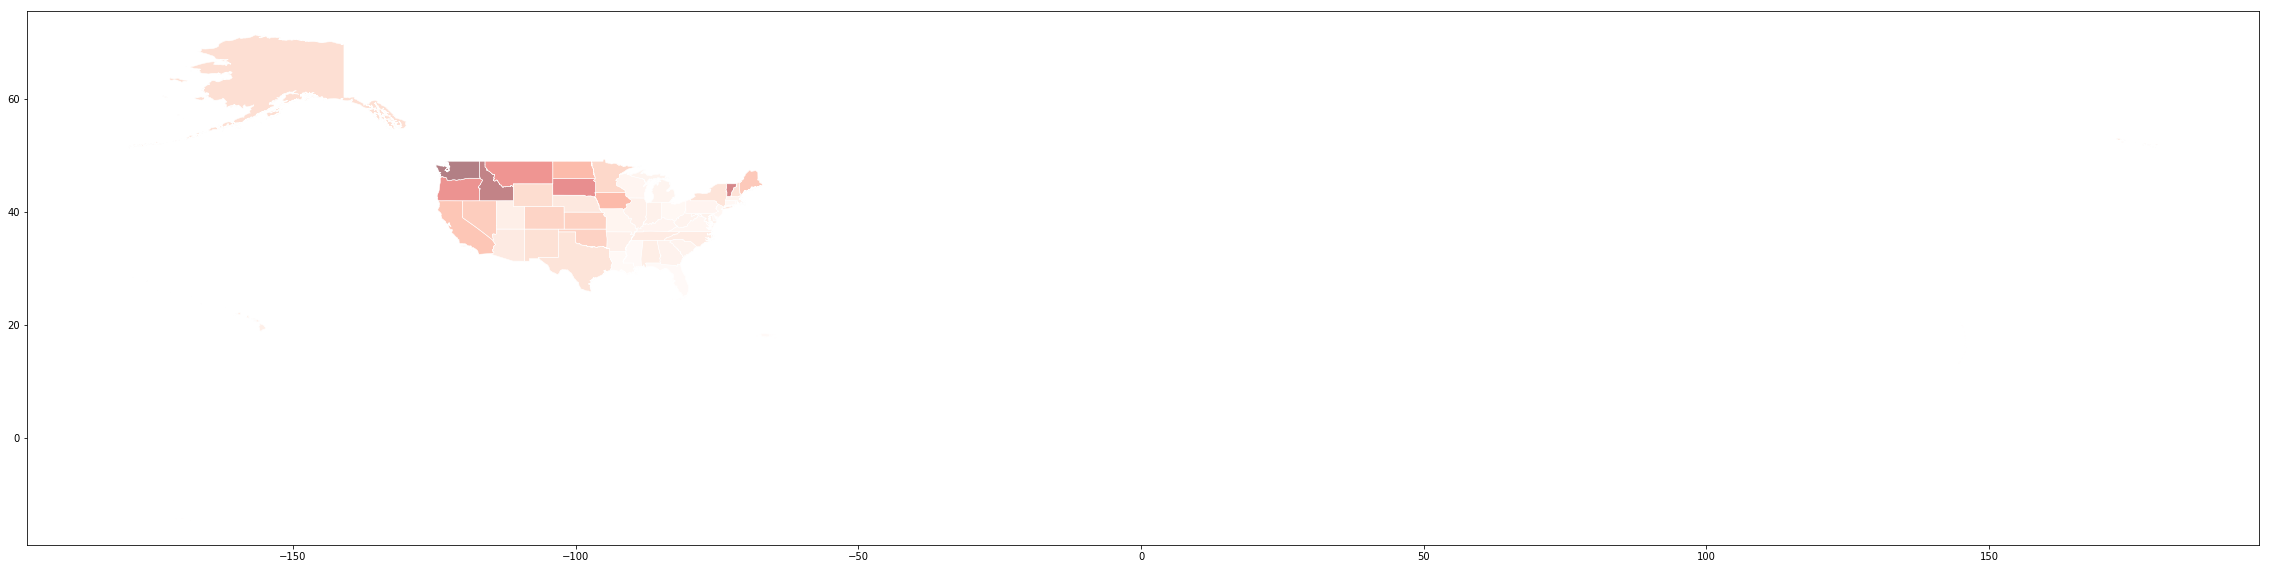

In [91]:
states.plot(column='renewable_pc', cmap='Reds', figsize=(40,25), edgecolor='white', linewidth=0.5)